In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.RandomState = 0
x_size = 6
y_size = 6
x1 = []
x2 = []
y = []
i = 0
step = 0.1
while(i < x_size):
    j = 0
    while(j < y_size):
        x1.append(i)
        x2.append(j)
        if(((x_size//2)-i)**2 + ((y_size//2)-j)**2 - 1 >= 0):
            if(int(np.random.rand() * 100)%100 == 0):
                y.append(0)
            else:
                y.append(1)
        else:
            if(int(np.random.rand() * 100)%100 == 0):
                y.append(1)
            else:
                y.append(0)
        j += step
    i += step

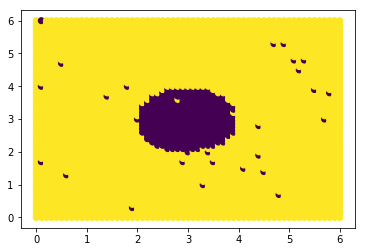

In [3]:
plt.scatter(x1,x2,c=y)
plt.show()

In [4]:
x = [ [x1[i],x2[i]] for i in range(len(x1))]
x = np.array(x)

In [5]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

In [16]:
clf = svm.SVC(kernel="rbf",gamma=0.1)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.9849624060150376

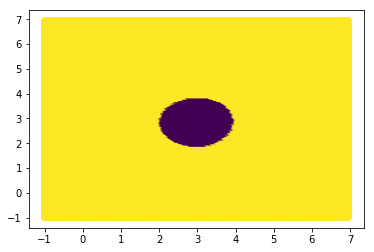

In [17]:
def makegrid(x1, x2, h = 0.05):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min, 
                  x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()